# pathes

In [27]:
import os


In [28]:
CUSTOM_MODEL_NAME     = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8'
PRETRAINED_MODEL_URL  = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz'
# TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME        = 'label_map.pbtxt'

In [29]:
paths = {
    'WORKSPACE_PATH': os.path.join('/Users/danil/Documents/github/clay', 'workspace'),
    'SCRIPTS_PATH': os.path.join('/Users/danil/Documents/github/clay/workspace','scripts'),
    'APIMODEL_PATH': os.path.join('/Users/danil/Documents/github/clay','models'),
    'ANNOTATION_PATH': os.path.join('/Users/danil/Documents/github/clay', 'tfrecords'),
    'IMAGE_PATH': os.path.join('/Users/danil/Documents/github/clay','jpg'),
    'MODEL_PATH': os.path.join('Tensor/Users/danil/Documents/github/clay', 'workspace', 'models'),
    'PRETRAINED_MODEL_PATH': os.path.join('/Users/danil/Documents/github/clay', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('/Users/danil/Documents/github/clay', 'workspace', 'models', CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('/Users/danil/Documents/github/clay', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    #'TFJS_PATH':os.path.join('/Users/danil/Documents/github/clay', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    #'TFLITE_PATH':os.path.join('/Users/danil/Documents/github/clay/TFODCourse', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('/Users/danil/Documents/github/clay','protoc')
 }

In [36]:
files = {
    'PIPELINE_CONFIG':os.path.join('/Users/danil/Documents/github/clay', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    #'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [31]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# check model

In [32]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

fatal: destination path '/Users/danil/Documents/github/clay/workspace/models' already exists and is not an empty directory.


In [8]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2023-02-22 18:02:25.970080: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Running tests under Python 3.8.2: /Users/danil/Documents/github/clay/env/bin/python
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2023-02-22 18:02:31.824533: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/danil/Documents/github/clay/env/lib/python3.8/site-packages/object_detection/builders/model_builder.py:1112: DeprecationWarning: The 'warn' function is deprecate

In [33]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2023-02-22 18:44:07--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz
Распознаётся download.tensorflow.org (download.tensorflow.org)… 2a00:1450:400c:c06::80, 173.194.76.128
Подключение к download.tensorflow.org (download.tensorflow.org)|2a00:1450:400c:c06::80|:80... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 20518283 (20M) [application/x-tar]
Сохранение в: «ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz»

ssd_mobilenet_v2_fp 100%[===================>]  19,57M  14,8MB/s    за 1,3s    

2023-02-22 18:44:08 (14,8 MB/s) - «ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz» сохранён [20518283/20518283]

x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/checkpoint
x ssd_mob

In [9]:
import object_detection

# label map

In [53]:
labels = [{'name':'TEXT', 'id':4}, 
          {'name':'IMAGE', 'id':1}, 
          {'name':'BUTTON', 'id':3}, 
          {'name':'TEXT_INPUT', 'id':6},
          {'name':'CHECK_BOX', 'id':8}, 
          {'name':'MAP', 'id':7}, 
          {'name':'SWITCH', 'id':9}, 
          {'name':'PAGER_INDICATOR', 'id':10},
          {'name':'SLIDER', 'id':11}, 
          {'name':'DATE_PICKER', 'id':22}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# update config

In [38]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}


In [12]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

2023-02-22 18:31:45.619289: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [48]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 640
       width: 640
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [49]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [50]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 8
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train_v2.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test_v2.record')]

In [51]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# train

In [41]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [46]:
paths['CHECKPOINT_PATH']

'/Users/danil/Documents/github/clay/workspace/models/my_ssd_mobnet'

In [47]:
files['PIPELINE_CONFIG']

'/Users/danil/Documents/github/clay/workspace/models/my_ssd_mobnet/pipeline.config'

In [42]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, 
                                                                                             paths['CHECKPOINT_PATH'],
                                                                                             files['PIPELINE_CONFIG'])


In [44]:
files['PIPELINE_CONFIG']

'/Users/danil/Documents/github/clay/workspace/models/my_ssd_mobnet/pipeline.config'

In [43]:
print(command)

python /Users/danil/Documents/github/clay/workspace/models/research/object_detection/model_main_tf2.py --model_dir=/Users/danil/Documents/github/clay/workspace/models/my_ssd_mobnet --pipeline_config_path=/Users/danil/Documents/github/clay/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=2000


# inference

In [55]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [57]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [58]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [59]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [103]:
paths['IMAGE_PATH'] = '/Users/danil/Documents/github/clay/jpg'

In [109]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], '42104.jpg')

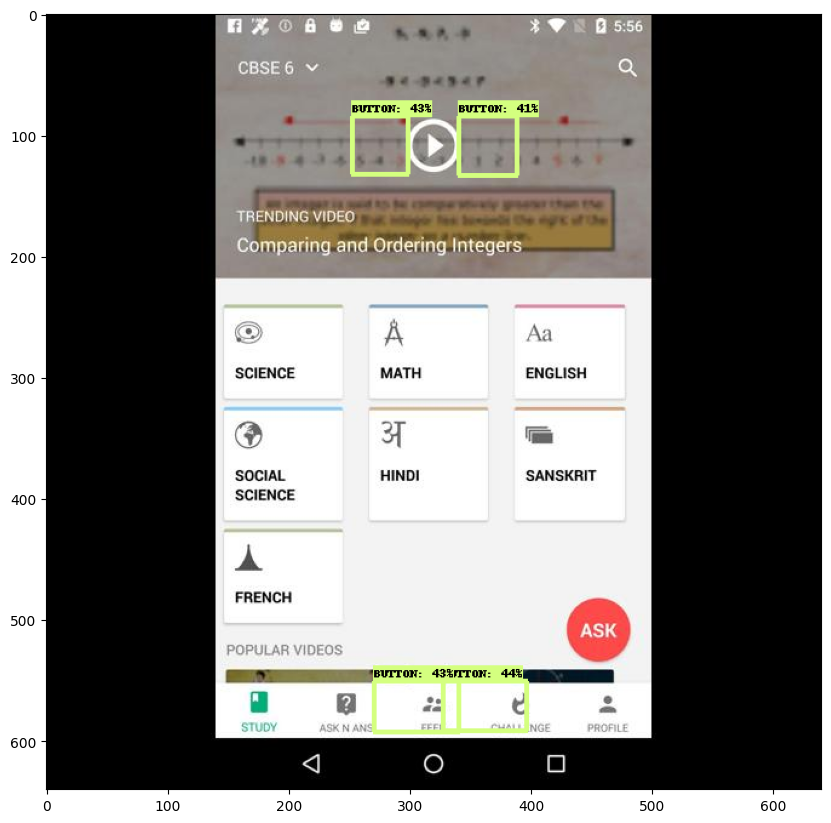

In [110]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.4,
            agnostic_mode=False)

plt.figure(figsize=(10, 15))
plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

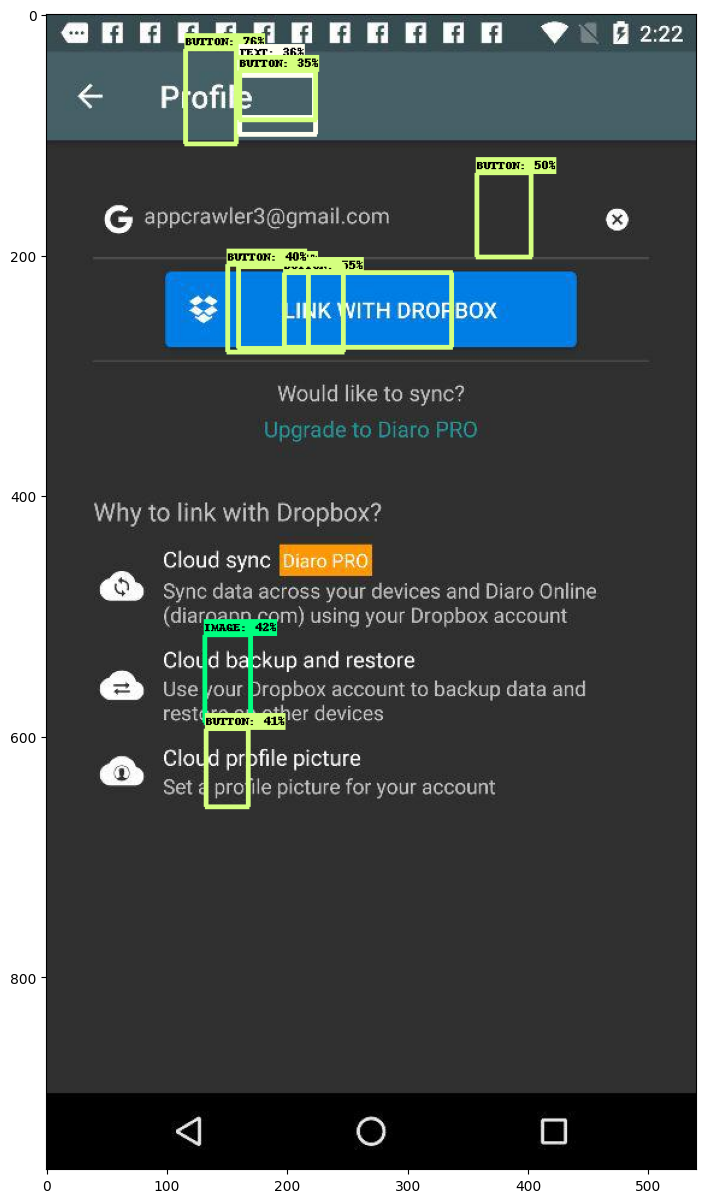

In [105]:
viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=10,
            min_score_thresh=.3,
            agnostic_mode=False)

plt.figure(figsize=(10, 15))
plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

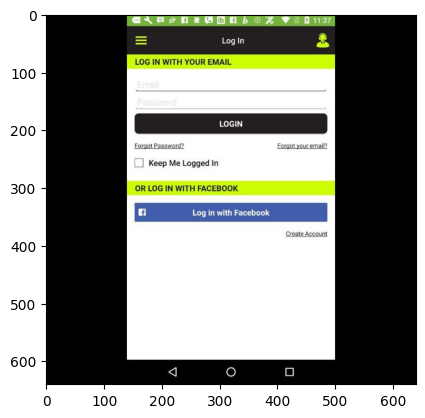

In [65]:
plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [64]:
detections['detection_boxes']

array([[0.03497059, 0.59137905, 0.10615586, 0.6628977 ],
       [0.5040736 , 0.29573923, 0.562922  , 0.5852726 ],
       [0.04426979, 0.38389063, 0.10062383, 0.50257355],
       [0.27071106, 0.33851   , 0.32063854, 0.4612278 ],
       [0.2715123 , 0.4947012 , 0.32156506, 0.619729  ],
       [0.03904255, 0.32183066, 0.10246796, 0.43059537],
       [0.03940576, 0.33334818, 0.10988714, 0.5597526 ],
       [0.26463234, 0.45787206, 0.32913798, 0.6248032 ],
       [0.2630513 , 0.34282237, 0.33174565, 0.5139285 ],
       [0.268717  , 0.38277146, 0.32117444, 0.50588244],
       [0.03780197, 0.385864  , 0.10996426, 0.6254651 ],
       [0.5778312 , 0.552501  , 0.6115981 , 0.63690287],
       [0.512322  , 0.3199074 , 0.55810076, 0.4528518 ],
       [0.        , 0.        , 1.        , 1.        ],
       [0.5049186 , 0.36949795, 0.5658839 , 0.6606124 ],
       [0.03642294, 0.32932895, 0.10588235, 0.47808743],
       [0.26221085, 0.38503766, 0.33014566, 0.56760186],
       [0.03958987, 0.54132885,